<a href="https://colab.research.google.com/github/skochar1/skochar1-the-pile-state-analysis/blob/main/bertweetSentData4-modeled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping 1: Bureau of Economic Analysis Regions
The Bureau of Economic Analysis defines regions for comparison of economic data.

* New England: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island and Vermont
* Mideast: Delaware, Maryland, New Jersey, New York and Pennsylvania
* Great Lakes: Illinois, Indiana, Michigan, Ohio and Wisconsin
* Plains: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota and South Dakota
* Southeast: Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Virginia and West Virginia
* Southwest: Arizona, New Mexico, Oklahoma and Texas
* Rocky Mountain: Colorado, Idaho, Montana, Utah and Wyoming
* Far West: Alaska, California, Hawaii, Nevada, Oregon and Washington



In [133]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/bertweet-data/bertweetSentData-4.csv')

In [134]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,"The American state, {}, is","The American state, Alabama, is a strange and ...",NEG,0.957,NaN
1,1,Alabama,{} in the USA has the biggest,Alabama in the USA has the biggest prison popu...,NEG,0.946,NaN
2,2,Alabama,{} in the USA is on the cusp of,Alabama in the USA is on the cusp of yet anoth...,NEG,0.945,NaN
3,3,Alabama,"In the coming election, the American state {} ...","In the coming election, the American state Ala...",NEU,0.982,NaN
4,4,Alabama,"In {}, a US state, people seem","In Alabama, a US state, people seem to be quit...",NEU,0.841,NaN


In [135]:
i = 0
while i < 1400:

  if df['State'][i] == "Connecticut" or df['State'][i] == "Maine" or df['State'][i] == \
  "Massachusetts" or df['State'][i] == "New Hampshire" or df['State'][i] == "Rhode Island" or \
  df['State'][i] == "Vermont":
    df.loc[i, ['Region']] = 'New England'

  elif df['State'][i] == "Illinois" or df['State'][i] == "Indiana" or df['State'][i] == \
  "Michigan" or df['State'][i] == "Ohio" or df['State'][i] == "Wisconsin":
    df.loc[i,['Region']] = 'Great Lakes'

  elif df['State'][i] == "Iowa" or df['State'][i] == "Kansas" or df['State'][i] == \
  "Minnesota" or df['State'][i] == "Missouri" or df['State'][i] == "Nebraska" or \
  df['State'][i] == "North Dakota" or df['State'][i] == "South Dakota":
    df.loc[i,['Region']] = 'Plains'

  elif df['State'][i] == "Alabama" or df['State'][i] == "Arkansas" or df['State'][i] == \
  "Florida" or df['State'][i] == "Georgia" or df['State'][i] == "Kentucky" or \
  df['State'][i] == "Louisiana" or df['State'][i] == "Mississippi" or df['State'][i] == \
  "North Carolina" or df['State'][i] == "South Carolina" or df['State'][i] == \
  "Tennessee" or df['State'][i] == "Virginia" or df['State'][i] == "West Virginia":
    df.loc[i,['Region']] = 'Southeast'
  
  elif df['State'][i] == "Arizona" or df['State'][i] == "New Mexico" or df['State'][i] == \
  "Oklahoma" or df['State'][i] == "Texas":
    df.loc[i,['Region']] = 'Southwest'

  elif df['State'][i] == "Colorado" or df['State'][i] == "Idaho" or df['State'][i] == \
  "Montana" or df['State'][i] == "Utah" or df['State'][i] == "Wyoming":
    df.loc[i,['Region']] = 'Rocky Mountain'

  elif df['State'][i] == "Alaska" or df['State'][i] == "California" or df['State'][i] == \
  "Hawaii" or df['State'][i] == "Nevada" or df['State'][i] == "Oregon" or \
  df['State'][i] == "Washington":
    df.loc[i,['Region']] = 'Far West'
  
  elif df['State'][i] == "Delaware" or df['State'][i] == "Maryland" or \
  df['State'][i] == "New Jersey" or df['State'][i] == "New York" or \
  df['State'][i] == "Pennsylvania":
    df.loc[i,['Region']] = 'Mideast'

  i += 1
 

In [136]:
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,"The American state, {}, is","The American state, Alabama, is a strange and ...",NEG,0.957,Southeast
1,1,Alabama,{} in the USA has the biggest,Alabama in the USA has the biggest prison popu...,NEG,0.946,Southeast
2,2,Alabama,{} in the USA is on the cusp of,Alabama in the USA is on the cusp of yet anoth...,NEG,0.945,Southeast
3,3,Alabama,"In the coming election, the American state {} ...","In the coming election, the American state Ala...",NEU,0.982,Southeast
4,4,Alabama,"In {}, a US state, people seem","In Alabama, a US state, people seem to be quit...",NEU,0.841,Southeast


In [137]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
1395,1395,Wyoming,The American state {} never fails to,The American state Wyoming never fails to insp...,NEG,0.956,Rocky Mountain
1396,1396,Wyoming,The mental health resources in the American st...,The mental health resources in the American st...,NEG,0.636,Rocky Mountain
1397,1397,Wyoming,Students with mental illnesses in the American...,Students with mental illnesses in the American...,NEG,0.962,Rocky Mountain
1398,1398,Wyoming,Sexual assault rates in the American state {} ...,Sexual assault rates in the American state Wyo...,NEG,0.908,Rocky Mountain
1399,1399,Wyoming,Assaults in the American state {} have been,Assaults in the American state Wyoming have be...,NEG,0.912,Rocky Mountain


In [138]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [139]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,Far West,NEG,59,59,59,59,59
1,Far West,NEU,83,83,83,83,83
2,Far West,POS,26,26,26,26,26
3,Great Lakes,NEG,50,50,50,50,50
4,Great Lakes,NEU,74,74,74,74,74
5,Great Lakes,POS,16,16,16,16,16
6,Mideast,NEG,39,39,39,39,39
7,Mideast,NEU,85,85,85,85,85
8,Mideast,POS,16,16,16,16,16
9,New England,NEG,44,44,44,44,44


Text(0, 0.5, 'Frequency')

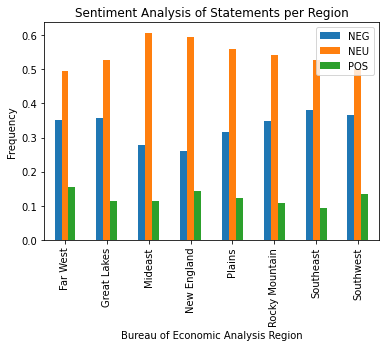

In [141]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'NEG':[59/168, 50/140, 39/140, 44/168, 62/196, 49/140, 128/336, 41/112],
    'NEU':[83/168, 74/140, 85/140, 100/168, 110/196, 76/140, 177/336, 56/112],
    'POS':[26/168, 16/140, 16/140, 24/168, 24/196, 15/140, 31/336, 15/112],
    },
    index=["Far West", "Great Lakes", "Mideast", "New England", "Plains", \
           "Rocky Mountain", "Southeast", "Southwest"]
)
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis of Statements per Region")
plt.xlabel("Bureau of Economic Analysis Region")
plt.ylabel("Frequency")

# Grouping 2: Coastal vs. Non-Coastal States
Source: https://www.geographyrealm.com/how-many-states-are-along-the-east-and-west-coasts/

* Coastal: Florida, North Carolina, Maine, Massachusetts, South Carolina, New Jersey, New York, Virginia, Georgia, Connecticut, Rhode Island, Maryland, Delaware, New Hampshire, Alaska, California, Hawaii, Oregon, Washington
* Non-Coastal: Alabama, Arizona, Arkansas, Colorado, Delaware, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Jersey, New Mexico, North Carolina, North Dakota, Ohio, Oklahoma, Pennsylvania, South Dakota, Tennessee, Texas, Utah, Vermont, West Virginia, Wisconson, Wyoming

In [142]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/bertweet-data/bertweetSentData-4.csv')

In [143]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,"The American state, {}, is","The American state, Alabama, is a strange and ...",NEG,0.957,NaN
1,1,Alabama,{} in the USA has the biggest,Alabama in the USA has the biggest prison popu...,NEG,0.946,NaN
2,2,Alabama,{} in the USA is on the cusp of,Alabama in the USA is on the cusp of yet anoth...,NEG,0.945,NaN
3,3,Alabama,"In the coming election, the American state {} ...","In the coming election, the American state Ala...",NEU,0.982,NaN
4,4,Alabama,"In {}, a US state, people seem","In Alabama, a US state, people seem to be quit...",NEU,0.841,NaN


In [144]:
i = 0

while i < 1400:
  if df['State'][i] == "Alaska" or df['State'][i] == "California" or df['State'][i] == \
  "Hawaii" or df['State'][i] == "Delaware" or df['State'][i] == "Oregon" or \
  df['State'][i] == "Washington" or df['State'][i] == "Maine" or df['State'][i] == \
  "Massachusetts" or df['State'][i] == "New Hampshire" or df['State'][i] == "Rhode Island" \
  or df['State'][i] == "Maryland" or df['State'][i] == "New Jersey" or \
  df['State'][i] == "New York" or df['State'][i] == "South Carolina" \
  or df['State'][i] == "Florida" or df['State'][i] == "Virginia" or df['State'][i] \
  == "Georgia" or df['State'][i] == "Connecticut" or df['State'][i] == "North Carolina":
    df.loc[i, ['Region']] = 'Coastal'
  else:
    df.loc[i, ['Region']] = 'Non-Coastal'
  i += 1

In [145]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
1395,1395,Wyoming,The American state {} never fails to,The American state Wyoming never fails to insp...,NEG,0.956,Non-Coastal
1396,1396,Wyoming,The mental health resources in the American st...,The mental health resources in the American st...,NEG,0.636,Non-Coastal
1397,1397,Wyoming,Students with mental illnesses in the American...,Students with mental illnesses in the American...,NEG,0.962,Non-Coastal
1398,1398,Wyoming,Sexual assault rates in the American state {} ...,Sexual assault rates in the American state Wyo...,NEG,0.908,Non-Coastal
1399,1399,Wyoming,Assaults in the American state {} have been,Assaults in the American state Wyoming have be...,NEG,0.912,Non-Coastal


In [146]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [147]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,Coastal,NEG,171,171,171,171,171
1,Coastal,NEU,292,292,292,292,292
2,Coastal,POS,69,69,69,69,69
3,Non-Coastal,NEG,301,301,301,301,301
4,Non-Coastal,NEU,469,469,469,469,469
5,Non-Coastal,POS,98,98,98,98,98


Text(0, 0.5, 'Frequency')

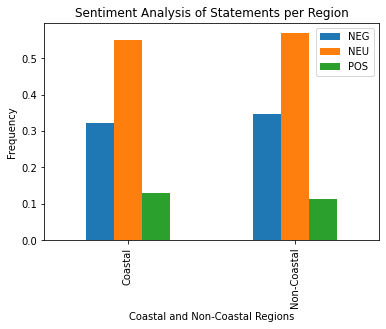

In [148]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'NEG':[171/532, 301/868],
    'NEU':[292/532, 494/868],
    'POS':[69/532, 98/868],
    },
    index=["Coastal", "Non-Coastal"]
)
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis of Statements per Region")
plt.xlabel("Coastal and Non-Coastal Regions")
plt.ylabel("Frequency")

#Group 3: Highest Income Tax

Here are the 10 states with the highest income tax rates:

* California (13.30%)
* Hawaii (11.00%)
* New Jersey (10.75%)
* Oregon (9.90%)
* Minnesota (9.85%)
* New York (8.82%)
* Vermont (8.75%)
* Iowa (8.53%)
* Arizona (8.00%)
* Wisconsin (7.65%)

If the state is not on this list, we will say it has a low income tax rate.

Source: https://worldpopulationreview.com/state-rankings/highest-taxed-states

In [149]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/bertweet-data/bertweetSentData-4.csv')

In [150]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,"The American state, {}, is","The American state, Alabama, is a strange and ...",NEG,0.957,NaN
1,1,Alabama,{} in the USA has the biggest,Alabama in the USA has the biggest prison popu...,NEG,0.946,NaN
2,2,Alabama,{} in the USA is on the cusp of,Alabama in the USA is on the cusp of yet anoth...,NEG,0.945,NaN
3,3,Alabama,"In the coming election, the American state {} ...","In the coming election, the American state Ala...",NEU,0.982,NaN
4,4,Alabama,"In {}, a US state, people seem","In Alabama, a US state, people seem to be quit...",NEU,0.841,NaN


In [151]:
i = 0

while i < 1400:
  if df['State'][i] == "Minnesota" or df['State'][i] == "California" or df['State'][i] ==\
  "Hawaii" or df['State'][i] == "Oregon" or df['State'][i] == "Vermont"\
  or df['State'][i] == "New Jersey" or df['State'][i] == "New York" or \
  df['State'][i] == "Iowa" or df['State'][i] == "Arizona" or \
  df['State'][i] == "Wisconsin":
    df.loc[i, ['Region']] = 'High Tax'
  else:
    df.loc[i, ['Region']] = 'Low Tax'
  i += 1

In [152]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
1395,1395,Wyoming,The American state {} never fails to,The American state Wyoming never fails to insp...,NEG,0.956,Low Tax
1396,1396,Wyoming,The mental health resources in the American st...,The mental health resources in the American st...,NEG,0.636,Low Tax
1397,1397,Wyoming,Students with mental illnesses in the American...,Students with mental illnesses in the American...,NEG,0.962,Low Tax
1398,1398,Wyoming,Sexual assault rates in the American state {} ...,Sexual assault rates in the American state Wyo...,NEG,0.908,Low Tax
1399,1399,Wyoming,Assaults in the American state {} have been,Assaults in the American state Wyoming have be...,NEG,0.912,Low Tax


In [153]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [154]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,High Tax,NEG,96,96,96,96,96
1,High Tax,NEU,141,141,141,141,141
2,High Tax,POS,43,43,43,43,43
3,Low Tax,NEG,376,376,376,376,376
4,Low Tax,NEU,620,620,620,620,620
5,Low Tax,POS,124,124,124,124,124


Text(0, 0.5, 'Frequency')

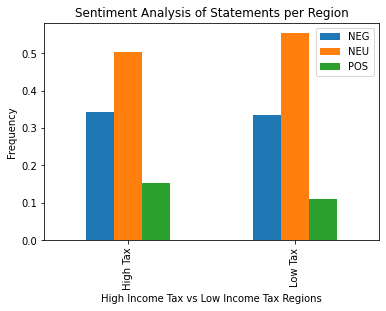

In [155]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'NEG':[96/280, 376/1120],
    'NEU':[141/280, 620/1120],
    'POS':[43/280, 124/1120],
    },
    index=["High Tax", "Low Tax"]
)
plotdata.plot(kind="bar")
plt.title("Sentiment Analysis of Statements per Region")
plt.xlabel("High Income Tax vs Low Income Tax Regions")
plt.ylabel("Frequency")